In [1]:
import numpy as np
import pandas as pd,os
from scipy.stats import wilcoxon, friedmanchisquare, rankdata
import scikit_posthocs as sp

## Notes
+ NB tops ranking with both metrics for Noisy data
+ RF & LR (both simple & balanced) tops for Clean datasets. Interestingly, simple methods without imbalanced technique (RF & LR) performs better than rest.

In [2]:
noise = pd.read_csv("Imb X Clf-Noisy.csv",header=[0,1,2],index_col=0)
noise.shape

(32, 52)

In [26]:
noise = pd.read_csv("Imb X Clf-Noisy.csv",header=[0,1,2],index_col=0)
clean = pd.read_csv("Imb X Clf-Clean.csv",header=[0,1,2],index_col=0)
df = clean - noise

In [47]:
tmp = df.drop(columns=['pr_rec_score'],axis=1,level=2)
tmp

imb                                            smote                    \
clf                                               dt                lr   
metric                             matthews_corrcoef matthews_corrcoef   
activemq-5.8.0.csv                          0.030069          0.038991   
groovy-1_6_BETA_1.csv                       0.084642          0.137262   
activemq-5.3.0.csv                          0.009070          0.010731   
wicket-1.3.0-incubating-beta-1.csv          0.086530          0.152533   
jruby-1.1.csv                               0.054488          0.000344   
jruby-1.4.0.csv                             0.120765          0.036631   
lucene-2.3.0.csv                            0.251054          0.231749   
hbase-0.95.2.csv                            0.149592          0.215749   
lucene-3.0.0.csv                            0.154368          0.073828   
camel-2.9.0.csv                             0.062434          0.049124   
wicket-1.5.3.csv                            0.074565          0.075168   
lucene-3.1.csv                             -0.013737         -0.016170   
groovy-1_6_BETA_2.csv                       0.142625          0.119016   
activemq-5.2.0.csv                          0.183765          0.099529   
groovy-1_5_7.csv                            0.134949          0.068533   
hbase-0.95.0.csv                            0.252444          0.163340   
camel-2.11.0.csv                            0.020908          0.061289   
jruby-1.7.0.preview1.csv                    0.032503          0.071451   
hive-0.10.0.csv                             0.225249          0.178735   
camel-2.10.0.csv                            0.082842          0.060585   
derby-10.2.1.6.csv                          0.252471          0.231770   
jruby-1.5.0.csv                             0.058609          0.084728   
derby-10.3.1.4.csv                          0.193214          0.101658   
lucene-2.9.0.csv                            0.109898          0.018230   
hbase-0.94.0.csv                            0.152483          0.161242   
camel-1.4.0.csv                             0.131986          0.113013   
activemq-5.1.0.csv                         -0.009315          0.030014   
activemq-5.0.0.csv                          0.225394          0.140138   
derby-10.5.1.1.csv                          0.053956          0.044923   
wicket-1.3.0-beta2.csv                      0.016882          0.074493   
hive-0.12.0.csv                             0.291169          0.202841   
hive-0.9.0.csv                              0.284269          0.123506   

imb                                                                     \
clf                                               nb               knn   
metric                             matthews_corrcoef matthews_corrcoef   
activemq-5.8.0.csv                          0.000556          0.050539   
groovy-1_6_BETA_1.csv                       0.043216          0.106709   
activemq-5.3.0.csv                         -0.002052         -0.064113   
wicket-1.3.0-incubating-beta-1.csv          0.020368          0.114588   
jruby-1.1.csv                               0.076981          0.039538   
jruby-1.4.0.csv                            -0.015520          0.077624   
lucene-2.3.0.csv                            0.154875          0.200393   
hbase-0.95.2.csv                            0.019538          0.126406   
lucene-3.0.0.csv                            0.012307          0.073890   
camel-2.9.0.csv                            -0.010739          0.023207   
wicket-1.5.3.csv                            0.042814          0.038710   
lucene-3.1.csv                             -0.018274          0.025750   
groovy-1_6_BETA_2.csv                       0.028170          0.040415   
activemq-5.2.0.csv                          0.027568          0.096575   
groovy-1_5_7.csv                            0.033948          0.103794   
hbase-0.95.0.csv                            0.036784          0.278481   
cam

In [48]:
mat = tmp.droplevel(2,axis=1)
print(mat.shape)

(32, 26)


In [49]:
res = mat.copy()
for d in mat.index:
    res.loc[d] = rankdata(mat.loc[d])
res

imb                                smote                           rus        \
clf                                   dt    lr    nb   knn    rf    dt    lr   
activemq-5.8.0.csv                  11.0  16.0   3.0  19.0  24.0  12.0   9.0   
groovy-1_6_BETA_1.csv               15.0  26.0   7.0  23.0  25.0   8.0  17.0   
activemq-5.3.0.csv                  13.0  16.0   7.0   1.0  21.0  12.0  19.0   
wicket-1.3.0-incubating-beta-1.csv  11.0  25.0   4.0  18.0  16.0  12.0  15.0   
jruby-1.1.csv                        7.0   1.0  12.0   5.0  23.0   4.0   2.0   
jruby-1.4.0.csv                     26.0  11.0   4.0  17.0  20.0  19.0  10.0   
lucene-2.3.0.csv                    24.0  20.0   7.0  15.0  16.0  26.0  13.0   
hbase-0.95.2.csv                    18.0  21.0   4.0  13.0  24.0   7.0  19.0   
lucene-3.0.0.csv                    23.0  11.0   4.0  12.0  26.0  17.0   8.0   
camel-2.9.0.csv                     18.0  14.0   1.0  11.0  24.0  12.0  15.0   
wicket-1.5.3.csv                    24.0  25.0  18.0  17.0  23.0   5.0  19.0   
lucene-3.1.csv                      14.0  12.0  10.0  24.0   7.0  22.0  19.0   
groovy-1_6_BETA_2.csv               20.0  16.0   7.0   8.0  15.0  10.0  17.0   
activemq-5.2.0.csv                  20.0  10.0   5.0   9.0  21.0  11.0   7.0   
groovy-1_5_7.csv                    25.0  18.0  14.0  21.0   5.0   4.0  11.0   
hbase-0.95.0.csv                    17.0   9.0   5.0  23.0  25.0  11.0   8.0   
camel-2.11.0.csv                    10.0  26.0   3.0  20.0   2.0  23.0  18.0   
jruby-1.7.0.preview1.csv            15.0  24.0   9.0  23.0   2.0  26.0  20.0   
hive-0.10.0.csv                     19.0  15.0   2.0  13.0  25.0  11.0   9.0   
camel-2.10.0.csv                    24.0  19.0   5.0  16.0  22.0   8.0  14.0   
derby-10.2.1.6.csv                  20.0  18.0   4.0  11.0  22.0   9.0  13.0   
jruby-1.5.0.csv                      8.0  14.0   6.0  22.0  23.0  15.0   9.0   
derby-10.3.1.4.csv                  18.0   6.0   2.0  14.0  21.0  10.0  11.0   
lucene-2.9.0.csv                    24.0   9.0   6.0  21.0  26.0  17.0   3.0   
hbase-0.94.0.csv                    15.0  17.0   2.0   8.0  24.0  11.0  16.0   
camel-1.4.0.csv                     25.0  19.0   3.0  23.0  24.0  10.0  13.0   
activemq-5.1.0.csv                   3.0  18.0   9.0  26.0  17.0  10.0  16.0   
activemq-5.0.0.csv                  19.0  15.0   2.0   9.0  24.0   7.0  11.0   
derby-10.5.1.1.csv                  15.0  12.0   5.0   9.0  22.0   8.0  19.0   
wicket-1.3.0-beta2.csv              11.0  23.0  10.0  25.0  14.0  15.0  24.0   
hive-0.12.0.csv                     21.0  13.0   2.0  12.0  26.0   9.0   7.0   
hive-0.9.0.csv                      21.0  10.0   4.0  15.0  23.0   9.0   8.0   

imb                                                   ... tomek              \
clf                                   nb   knn    rf  ...    lr    nb   knn   
activemq-5.8.0.csv                   8.0  14.0  13.0  ...  23.0   6.0  17.0   
groovy-1_6_BETA_1.csv                6.0  14.0  12.0  ...  10.0   1.0  11.0   
activemq-5.3.0.csv                   8.0   2.0   9.0  ...  23.0  14.0  22.0   
wicket-1.3.0-incubating-beta-1.csv   1.0   9.0  10.0  ...   6.0   2.0  19.0   
jruby-1.1.csv                       13.0  20.0   6.0  ...  17.0  10.0  22.0   
jruby-1.4.0.csv                      3.0  18.0  16.0  ...   6.0   1.0   9.0   
lucene-2.3.0.csv                    10.0   8.0  14.0  ...  17.0  11.0  12.0   
hbase-0.95.2.csv                     3.0  16.0   9.0  ...  25.0   5.0  20.0   
lucene-3.0.0.csv                     5.0  10.0  13.0  ...  20.0   2.0  18.0   
camel-2.9.0.csv                      3.0   7.0  13.0  ...  26.0   2.0  17.0   
wicket-1.5.3.csv                    14.0   6.0   4.0  ...  22.0  13.0  21.0   
lucene-3.1.csv                      16.0  15.0  23.0  ...   9.0   8.0   1.0   
groovy-1_6_BETA_2.csv                5.0  12.0  18.0  ...  24.0   6.0   2.0   
activemq-5.2.0.csv                   6.0   8.0  13.0  ...  22.0   1.0  17.0   
groovy-1_5_7.cs

In [50]:
res.mean().sort_values()

imb     clf      
wilson  nb            5.18750
ens     bbag_NB       5.21875
rus     nb            5.65625
tomek   nb            5.75000
smote   nb            5.81250
ens     rboost_NB     7.15625
rus     knn          12.03125
        dt           12.18750
        rf           12.75000
ens     rboost_DT    13.00000
rus     lr           13.09375
wilson  lr           14.15625
        dt           15.59375
tomek   knn          15.71875
smote   knn          15.71875
wilson  knn          15.81250
tomek   dt           15.84375
smote   lr           15.90625
ens     bbag_DT      16.62500
sim     LR           17.21875
smote   dt           17.31250
tomek   lr           17.40625
wilson  rf           18.00000
sim     RF           18.21875
smote   rf           19.75000
tomek   rf           19.87500
dtype: float64

In [51]:
res.mean(level=0,axis=1).mean()

imb
smote     14.90000
rus       11.14375
wilson    13.75000
tomek     14.91875
ens       10.50000
sim       17.71875
dtype: float64

In [52]:
res.mean(level=1,axis=1).mean()

clf
dt           15.234375
lr           15.140625
nb            5.601562
knn          14.820312
rf           17.593750
rboost_DT    13.000000
rboost_NB     7.156250
bbag_DT      16.625000
bbag_NB       5.218750
LR           17.218750
RF           18.218750
dtype: float64

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

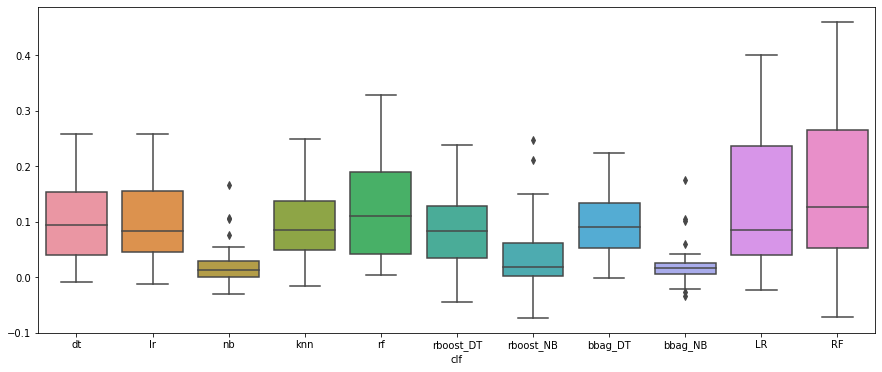

In [54]:
plt.figure(figsize=(15,6))
sns.boxplot(data=mat.mean(level=1,axis=1));

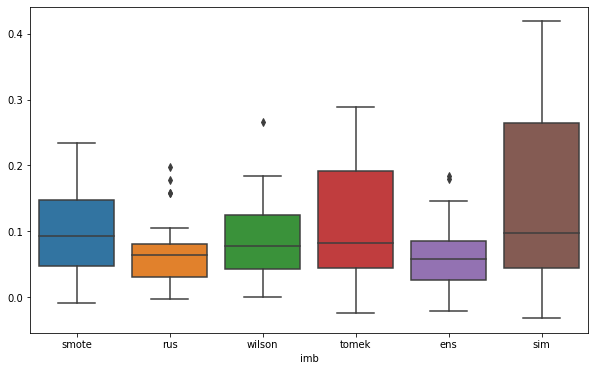

In [55]:
plt.figure(figsize=(10,6))
sns.boxplot(data=mat.mean(level=0,axis=1));